In [1]:
##importing the required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
##loading the data.
df = pd.read_csv(r"C:\Users\kandu\Downloads\Iris.csv")

In [5]:
##for clustering we use features.
X = df.drop(['Id', 'Species'], axis=1)
print("First 5 rows of the feature data:")
print(X.head())

First 5 rows of the feature data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


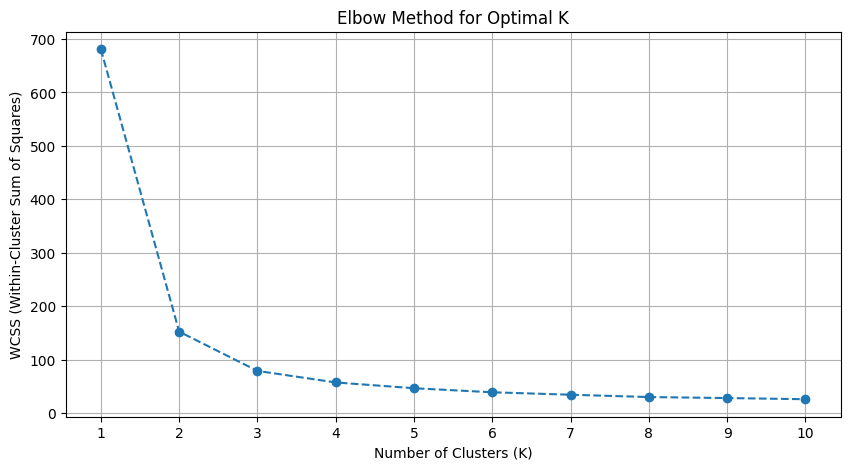

In [8]:
##findingbth k.
##Elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

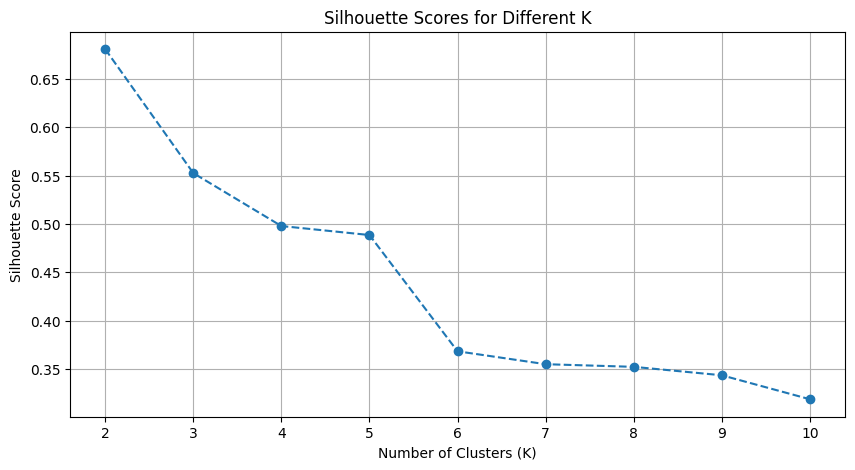

In [9]:
##silhouette score
silhouette_scores = []
k_range_sil = range(2, 11) ##Silhouette score requires at least 2 clusters.
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 5))
plt.plot(k_range_sil, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_sil)
plt.grid(True)
plt.show()

In [10]:
##applying k-means with optimal k and visuvalizing.
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
final_clusters = kmeans_final.fit_predict(X)
df['Cluster'] = final_clusters##adding clusters to our data.
print("Data with assigned clusters (first 5 rows):")
print(df.head())

Data with assigned clusters (first 5 rows):
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


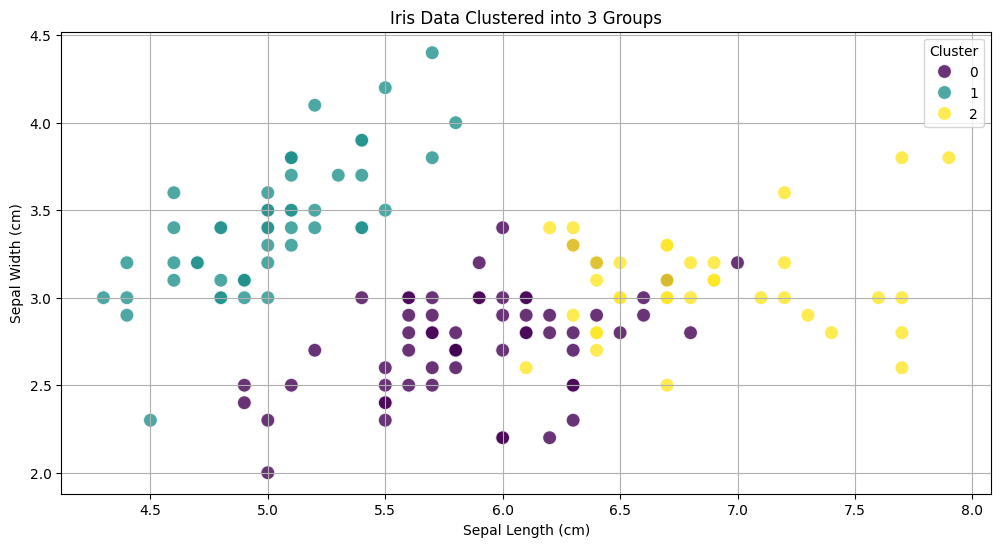

In [12]:
##2D plot.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'Iris Data Clustered into {optimal_k} Groups')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()